# **PRAKTIKUM 1 - Membandingkan hasil dari esact NN dengan ANNOY**

Instalasi ANNOY melalui cmd

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 0.0 ms

Annoy NN index: [219, 429, 540]
Annoy NN jarak: [np.float64(0.0), np.float64(14.226342949460172), np.float64(8.050748999274271)]
Waktu Annoy: 0.0 ms


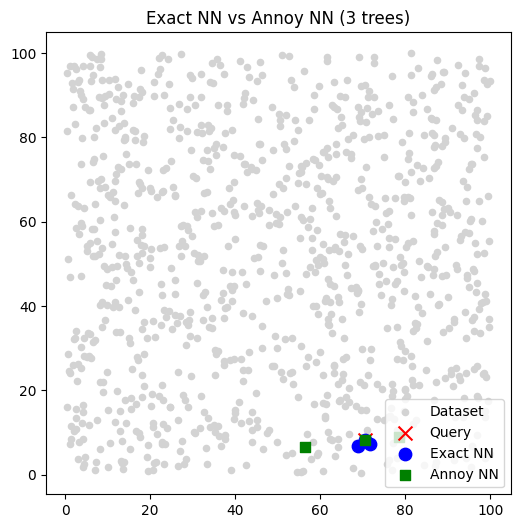

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(8)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

### Hasil Eksperimen Approximate Nearest Neighbors (ANN)

| Distance Metrics | Tree | Jumlah data | Hasil Index terdekat ENN vs ANN | Waktu komputasi Vs (s) |
|------------------|-------|--------------|----------------------------------|--------------------------|
| Euclidean        | 3     | 1,000        | [219 898 593], [219 898 770]    | 1.2271 , 0.1264         |
| Euclidean        | 8     | 1,000        | [219 898 593], [219, 898, 593]  | 0.5901 , 0.1602        |
| Euclidean        | 3     | 100,000      | [64040 64186 88792], [64040, 64186, 88792] | 32.6312 , 0.1435 |
| Angular          | 3     | 1,000        | [219 898 593], [219, 429, 540]  | 0.813 , 0.1485 |
| Angular          | 8     | 1,000        | [219 898 593], [219, 429, 540]  | 0.9704 , 0.1271 |
| Angular          | 3     | 100,000      | [64040 64186 88792], [64040, 1310, 9720]  | 9.0191 , 0.1283 |


berdasarkan data pada tabel, algoritma Approximate Nearest Neighbor (ANN) dengan pustaka Annoy mampu mempercepat pencarian tetangga terdekat secara signifikan dibandingkan Exact Nearest Neighbor (ENN), terutama ketika ukuran data meningkat. Misalnya, pada data sebanyak 100.000 titik dengan metrik Euclidean, waktu komputasi ENN mencapai 32.6312 detik, sedangkan ANN hanya membutuhkan 0.1435 detik, atau sekitar 227 kali lebih cepat, dengan hasil indeks tetangga yang tetap sangat mirip [64040,64186,88792]. Untuk data berukuran kecil (1.000 titik), perbedaan waktu tidak terlalu besar, tetapi ANN tetap lebih cepat, seperti pada Euclidean 3 tree (1.2271 s vs 0.1264 s) dan Angular 3 tree (0.813 s vs 0.1485 s). Selain itu, penggunaan Angular metric menunjukkan performa waktu yang sedikit lebih baik pada dataset kecil, dengan hasil tetangga terdekat yang masih konsisten. Secara keseluruhan, semakin besar dataset, semakin terlihat keunggulan ANN dalam efisiensi waktu, sementara akurasi hasil tetap mendekati metode ENN.